In [1]:
import json
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.gridspec as gridspec

In [2]:
def get_model_data(model_name):
    figure_data = f'figures/sparse_probes/{model_name}.json'
    with open(figure_data) as file:
        data = json.load(file)

    hookpoints = list(list(data.values())[0].keys())
    num_layers = len(hookpoints)

    reg_lambdas = sorted(list(data.keys()), key=lambda x: float(x))

    return data, hookpoints, reg_lambdas

In [3]:
model_names = ['pythia-14m', 'pythia-70m', 'pythia-160m', 'pythia-410m', 'pythia-1b', 'pythia-1.4b', 'pythia-2.8b']

C:\Users\Bruger\AppData\Local\Temp\ipykernel_1584\4208372189.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


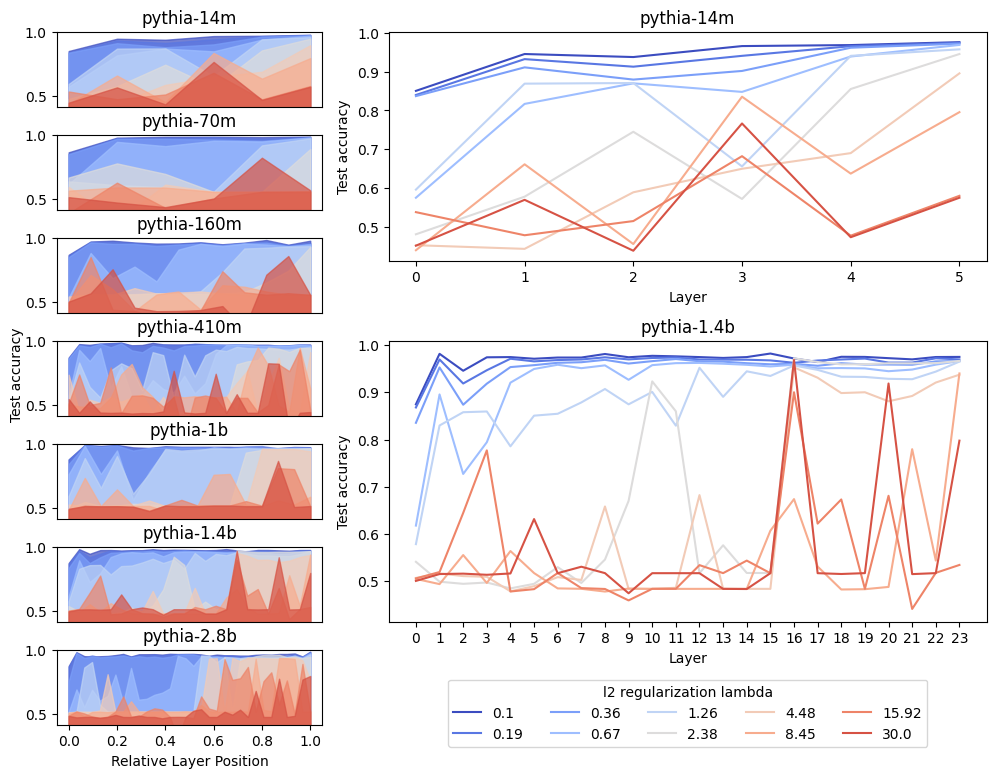

In [8]:
cmap = plt.cm.coolwarm 


fig = plt.figure(figsize=(12, 9))
gs = gridspec.GridSpec(14, 3, figure=fig, hspace=1.2, wspace=0.25)
axs = []
for i in range(7):
    if i == 0:

        axs.append(fig.add_subplot(gs[0:2, 0]))
    else:
        axs.append(fig.add_subplot(gs[i*2:i*2+2, 0], sharex=axs[0]))

for idx, (ax, model_name) in enumerate(zip(axs, model_names)):
    data, hookpoints, reg_lambdas = get_model_data(model_name)
    num_colors = len(reg_lambdas)
    num_layers = len(hookpoints)

    
    colors = [cmap((i / num_colors)) for i in range(num_colors)]

    # Normalized x-axis values (0 to 1 range)
    normalized_x = np.linspace(0, 1, num_layers)

    ax.set_title(model_name)
    if (idx + 1) % 7 == 0:
        ax.set_xlabel('Relative Layer Position')
    else:
        ax.tick_params(bottom=False, labelbottom=False)

    for reg_lambda, color in zip(reg_lambdas, colors):
        acc = data[reg_lambda]
        # Match the length of normalized_x with acc values
        acc_values = list(acc.values())
        ax.fill_between(
            normalized_x, 
            np.zeros_like(acc_values), 
            acc_values, 
            color=color,
            alpha=0.7)

    ax.set_ylim(0.42, 1)




bigax1 = fig.add_subplot(gs[:5, 1:3])

model_name = model_names[0]

data, hookpoints, reg_lambdas = get_model_data(model_name)
num_colors = len(reg_lambdas)
num_layers = len(hookpoints)

colors = [cmap((i / num_colors)) for i in range(num_colors)]

bigax1.set_title(model_name)
bigax1.set_xticks(range(num_layers))
bigax1.set_xticklabels(range(num_layers))
bigax1.set_xlabel('Layer')
bigax1.set_ylabel('Test accuracy')

for reg_lambda, color in zip(reg_lambdas, colors):
    acc = data[reg_lambda]
    bigax1.plot(acc.keys(), acc.values(), color=color)






bigax2 = fig.add_subplot(gs[6:12, 1:3])

model_name = model_names[5]

data, hookpoints, reg_lambdas = get_model_data(model_name)
num_colors = len(reg_lambdas)
num_layers = len(hookpoints)

colors = [cmap((i / num_colors)) for i in range(num_colors)]

bigax2.set_title(model_name)
bigax2.set_xticks(range(num_layers))
bigax2.set_xticklabels(range(num_layers))
bigax2.set_xlabel('Layer')
bigax2.set_ylabel('Test accuracy')

for reg_lambda, color in zip(reg_lambdas, colors):
    acc = data[reg_lambda]
    bigax2.plot(acc.keys(), acc.values(), color=color, label=round(float(reg_lambda), 2))


legend_ax = fig.add_subplot(gs[13, 1:3])  # Use the bottom-right grid cell for the legend
legend_ax.axis('off')

handles, labels = bigax2.get_legend_handles_labels()  # Get legend handles and labels
legend_ax.legend(handles, labels, loc='center', ncol=5, title='l2 regularization lambda')

# Customize the shared x-axis at the bottom
fig.text(0.092, 0.5, 'Test accuracy', 
         va='center', 
         ha='center', 
         rotation=90, 
         fontsize=10)
fig.tight_layout()
out_file = 'figures/sparse_probes_superfigure/superfigure.pdf'
fig.savefig(out_file, bbox_inches='tight', pad_inches=0.1)
plt.show()

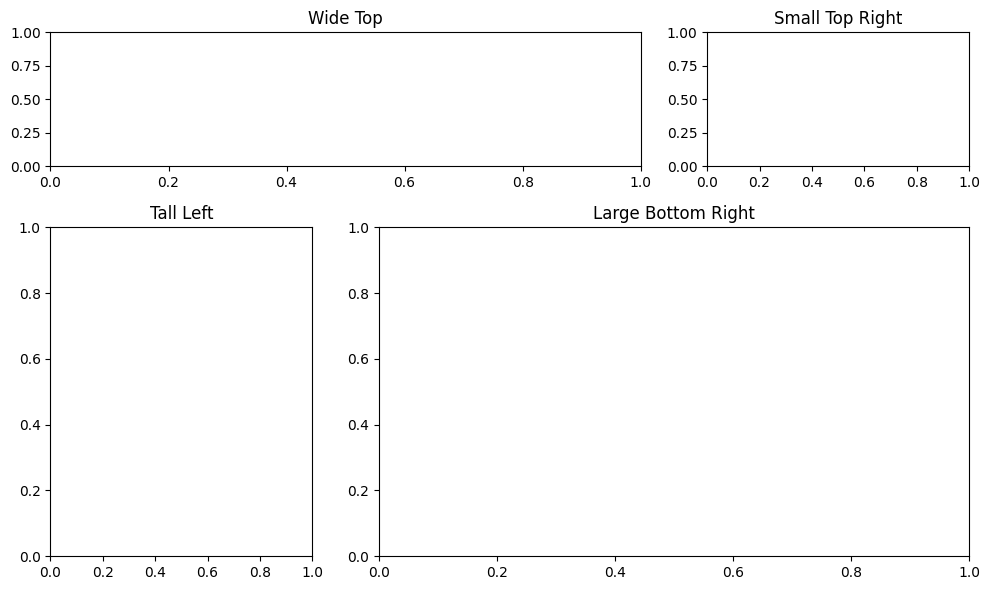

In [68]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(3, 3, figure=fig)

# Create differently sized subplots
ax1 = fig.add_subplot(gs[0, :2])  # Top left (spanning 2 columns)
ax2 = fig.add_subplot(gs[0, 2])   # Top right
ax3 = fig.add_subplot(gs[1:, 0])  # Bottom left (spanning 2 rows)
ax4 = fig.add_subplot(gs[1:, 1:]) # Bottom right (spanning 2x2 cells)

ax1.set_title("Wide Top")
ax2.set_title("Small Top Right")
ax3.set_title("Tall Left")
ax4.set_title("Large Bottom Right")

fig.tight_layout()
plt.show()
